# Assignment 10

In [1]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

football isnt just a game to me its a feeling a rhythm that runs through my veins every time i step onto the field or hear the crowd roar theres something magical about the sound of the ball the rush of a counterattack and the way a single goal can lift an entire spirit it teaches me more than any classroom ever could about passion teamwork and never giving up no matter how tough life gets football is my escape my therapy my joy its not just what i watch or play its a part of who i am
Word tokens: 
 ['football', 'isnt', 'just', 'a', 'game', 'to', 'me', 'its', 'a', 'feeling', 'a', 'rhythm', 'that', 'runs', 'through', 'my', 'veins', 'every', 'time', 'i', 'step', 'onto', 'the', 'field', 'or', 'hear', 'the', 'crowd', 'roar', 'theres', 'something', 'magical', 'about', 'the', 'sound', 'of', 'the', 'ball', 'the', 'rush', 'of', 'a', 'counterattack', 'and', 'the', 'way', 'a', 'single', 'goal', 'can', 'lift', 'an', 'entire', 'spirit', 'it', 'teaches', 'me', 'more', 'than', 'any', 'classroom', 'e

<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

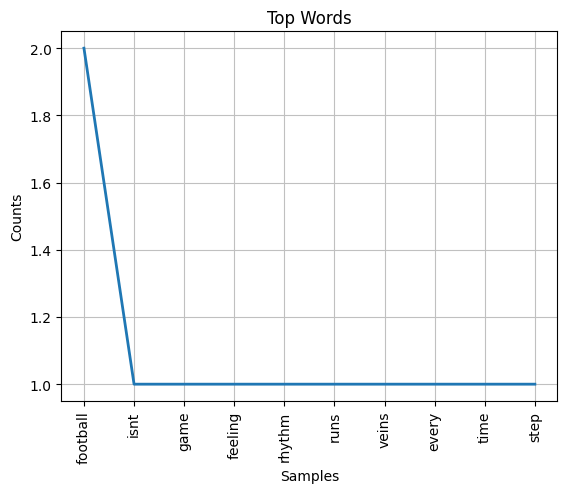

In [22]:
para = "Football isn’t just a game to me, It’s a feeling, a rhythm that runs through my veins every time I step onto the field or hear the crowd roar. There’s something magical about the sound of the ball, the rush of a counterattack, and the way a single goal can lift an entire spirit. It teaches me more than any classroom ever could, about passion, teamwork, and never giving up. No matter how tough life gets, football is my escape, my therapy, my joy. It’s not just what I watch or play; it’s a part of who I am."
para = para.lower()
para_clean = re.sub(r'[^\w\s]', '', para)
print(para_clean)

word_tokens = word_tokenize(para_clean)
sent_tokens = sent_tokenize(para)
print("Word tokens: \n",word_tokens)
print("Sentence tokens: \n",sent_tokens)
print()

split= para_clean.split()
for i in range(len(split)):
  print(f"Using nltk -> {word_tokens[i]}, Using split -> {split[i]}")
print()

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in word_tokens if w.lower() not in stop_words]
print("Without stopwords:\n", filtered_words)
print()

fd = FreqDist(filtered_words)
fd.plot(10, title="Top Words")

In [23]:
print("Words containing only alphabets: \n",re.findall(r'\b[a-zA-Z]+\b', para))
print()

print("Without stopwords:\n", filtered_words)
print()

ps = PorterStemmer()
lm = WordNetLemmatizer()

for word in filtered_words:
    print(f"{word} -> PorterStemmer: {ps.stem(word)},    Lemmatized: {lm.lemmatize(word)} ")
print()


Words containing only alphabets: 
 ['football', 'isn', 't', 'just', 'a', 'game', 'to', 'me', 'it', 's', 'a', 'feeling', 'a', 'rhythm', 'that', 'runs', 'through', 'my', 'veins', 'every', 'time', 'i', 'step', 'onto', 'the', 'field', 'or', 'hear', 'the', 'crowd', 'roar', 'there', 's', 'something', 'magical', 'about', 'the', 'sound', 'of', 'the', 'ball', 'the', 'rush', 'of', 'a', 'counterattack', 'and', 'the', 'way', 'a', 'single', 'goal', 'can', 'lift', 'an', 'entire', 'spirit', 'it', 'teaches', 'me', 'more', 'than', 'any', 'classroom', 'ever', 'could', 'about', 'passion', 'teamwork', 'and', 'never', 'giving', 'up', 'no', 'matter', 'how', 'tough', 'life', 'gets', 'football', 'is', 'my', 'escape', 'my', 'therapy', 'my', 'joy', 'it', 's', 'not', 'just', 'what', 'i', 'watch', 'or', 'play', 'it', 's', 'a', 'part', 'of', 'who', 'i', 'am']

Without stopwords:
 ['football', 'isnt', 'game', 'feeling', 'rhythm', 'runs', 'veins', 'every', 'time', 'step', 'onto', 'field', 'hear', 'crowd', 'roar', 't

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

sent1 = "India needs its cards right to navigate a world governed by Trump’s tariffs"
sent2 = "Magnitude 5.2 earthquake shakes interior of San Diego County in California"
sent3 = "Parents worried after CBSE withdraws school's affiliation, leaves EWS students stranded"
sentences = [sent1,sent2,sent3]

cv = CountVectorizer()
X = cv.fit_transform(sentences)
print(cv.get_feature_names_out())
print(X.toarray())
print()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentences)
feature_names = tfidf.get_feature_names_out()
print(tfidf.get_feature_names_out())
tfidf_matrix_to_array = tfidf_matrix.toarray()
print(tfidf_matrix_to_array)
print()

for i, row in enumerate(tfidf_matrix_to_array):
    print(f"Sentence {i+1} top 3 keywords:")
    top_indices = row.argsort()[::-1][:3]
    for idx in top_indices:
        print(feature_names[idx])
    print()

['affiliation' 'after' 'by' 'california' 'cards' 'cbse' 'county' 'diego'
 'earthquake' 'ews' 'governed' 'in' 'india' 'interior' 'its' 'leaves'
 'magnitude' 'navigate' 'needs' 'of' 'parents' 'right' 'san' 'school'
 'shakes' 'stranded' 'students' 'tariffs' 'to' 'trump' 'withdraws' 'world'
 'worried']
[[0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0]
 [0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1]]

['affiliation' 'after' 'by' 'california' 'cards' 'cbse' 'county' 'diego'
 'earthquake' 'ews' 'governed' 'in' 'india' 'interior' 'its' 'leaves'
 'magnitude' 'navigate' 'needs' 'of' 'parents' 'right' 'san' 'school'
 'shakes' 'stranded' 'students' 'tariffs' 'to' 'trump' 'withdraws' 'world'
 'worried']
[[0.         0.         0.28867513 0.         0.28867513 0.
  0.         0.         0.         0.         0.28867513 0.
  0.28867513 0.         0.28867513 0.         0.         0.28867513
  0

In [33]:
t1 = "Blockchain is a decentralized digital ledger that records transactions across multiple computers.It ensures transparency and security by making data tamper-resistant.Popularized by cryptocurrencies like Bitcoin, its uses now span finance, supply chain, and even voting systems.Each block in the chain contains a set of transactions, linked securely using cryptography."
t2 = "Augmented Reality blends digital elements with the real world through smartphones or AR glasses.It enhances user experiences by overlaying visuals, sounds, or data on what you see.Used in games like Pokémon GO and industries like retail and healthcare, AR brings interactivity to life.It bridges the gap between physical and virtual environments in real-time."

data1 = set(t1.split())
data2 = set(t2.split())
jaccard = len(data1 & data2) / len(data1 | data2)
print("Jaccard Similarity:", jaccard)

from sklearn.metrics.pairwise import cosine_similarity
tfidf_vec = TfidfVectorizer()
vecs = tfidf_vec.fit_transform([t1,t2])
cos_sim = cosine_similarity(vecs[0:1], vecs[1:2])
print("Cosine Similarity:", cos_sim[0][0])

Jaccard Similarity: 0.08333333333333333
Cosine Similarity: 0.16039962807304733


I recently tried the Anker Soundcore Life Q30 headphones, and they genuinely exceeded my expectations. The sound quality is crisp with deep bass, and the active noise cancellation works surprisingly well for the price. It’s okay; some features are useful, but others feel unnecessary.


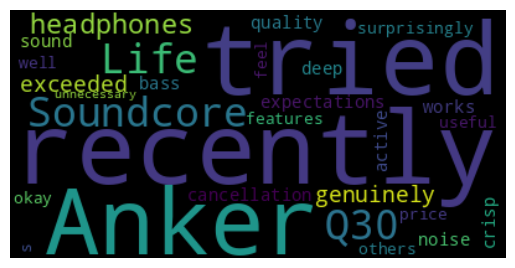

In [39]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
review1 = "I recently tried the Anker Soundcore Life Q30 headphones, and they genuinely exceeded my expectations. The sound quality is crisp with deep bass, and the active noise cancellation works surprisingly well for the price."
review2 = "It’s okay; some features are useful, but others feel unnecessary."
review3 = "The new update made the app crash frequently, and I lost all my saved data. Very frustrating experience."
reviews = [review1,review2,review3]

results = []
for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    if polarity > 0.1:
        sentiment = 'Positive'
    elif polarity < -0.1:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    results.append({
        'review': review,
        'polarity': polarity,
        'subjectivity': subjectivity,
        'sentiment': sentiment
    })

positive_review = " ".join(r['review'] for r in results if r['sentiment'] == 'Positive')
print(positive_review)
wc = WordCloud().generate(positive_review)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

text = (
    "Sunlight streamed through the open window, painting the wooden floor with golden patterns. "
    "The gentle hum of morning filled the room as birds sang in the garden outside. "
    "A soft breeze carried the scent of fresh dew and blooming flowers. "
    "On the desk, a notebook lay open, pages fluttering slightly, waiting to be filled with thoughts and dreams. "
    "The promise of a new day felt tangible, each moment brimming with potential. "
    "In that quiet stillness, inspiration stirred, urging pen to paper. "
    "It was a simple morning, yet within its calm beauty lay the seeds of countless stories waiting to be told."
)

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
token_list = tokenizer.texts_to_sequences([text])[0]
for i in range(1, len(token_list)):
    n_gram_seq = token_list[: i + 1]
    input_sequences.append(n_gram_seq)

max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding="pre")

X = input_sequences[:, :-1]
labels = input_sequences[:, -1]
y = to_categorical(labels, num_classes=total_words)

model = Sequential([
    Embedding(input_dim=total_words, output_dim=50, input_length=max_seq_len - 1),
    LSTM(100),
    Dense(total_words, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X, y, epochs=100, verbose=1)

def generate_text(seed_text, next_words, model, tokenizer, max_seq_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding="pre")
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=1)[0]
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                seed_text += " " + word
                break
    return seed_text

seed = "morning"
print(generate_text(seed, 30, model, tokenizer, max_seq_len))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.0182 - loss: 4.3308
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0839 - loss: 4.3213
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1141 - loss: 4.3123
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0777 - loss: 4.2975
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.0891 - loss: 4.2367
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1173 - loss: 4.1445
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.0985 - loss: 4.1238
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0860 - loss: 4.1597
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1047 - loss: 4.0902
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0995 - loss: 4.0945
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0891 - loss: 4.0688
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1141 - lo